<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/2021_1_%EC%82%B0%EC%97%85%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0/%EA%B3%BC%EC%A0%9C/2021_0527_ResNet/2021_0527_ResNet_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


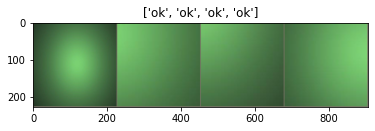

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.4361 Acc: 0.8778
test Loss: 0.4327 Acc: 0.8333

Epoch 1/24
----------
train Loss: 0.4107 Acc: 0.8611
test Loss: 0.5297 Acc: 0.8333

Epoch 2/24
----------
train Loss: 0.3996 Acc: 0.8722
test Loss: 0.4629 Acc: 0.8333

Epoch 3/24
----------
train Loss: 0.4131 Acc: 0.8889
test Loss: 0.4609 Acc: 0.8333

Epoch 4/24
----------
train Loss: 0.3714 Acc: 0.8389
test Loss: 1.3282 Acc: 0.8333

Epoch 5/24
----------
train Loss: 0.5293 Acc: 0.8500
test Loss: 0.4215 Acc: 0.8333

Epoch 6/24
----------
train Loss: 0.4014 Acc: 0.8889
test Loss: 0.4297 Acc: 0.8333

Epoch 7/24
----------
train Loss: 0.3451 Acc: 0.8889
test Loss: 0.3899 Acc: 0.8333

Epoch 8/24
----------
train Loss: 0.3503 Acc: 0.8889
test Loss: 0.3300 Acc: 0.8333

Epoch 9/24
----------
train Loss: 0.3357 Acc: 0.8889
test Loss: 0.3982 Acc: 0.8333

Epoch 10/24
----------
train Loss: 0.3133 Acc: 0.8889
test Loss: 0.3370 Acc: 0.8333

Epoch 11/24
----------
train Loss: 0.3311 Acc: 0.8889
test Loss: 0.4094 Acc: 0.8333

Epoch 12/24


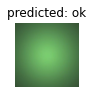

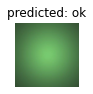

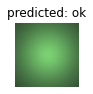

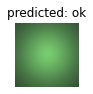

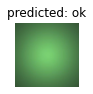

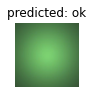

Epoch 0/24
----------
train Loss: 0.6121 Acc: 0.8222
test Loss: 1.3102 Acc: 0.8333

Epoch 1/24
----------
train Loss: 0.5280 Acc: 0.8833
test Loss: 0.4442 Acc: 0.8333

Epoch 2/24
----------
train Loss: 0.3350 Acc: 0.8889
test Loss: 0.4446 Acc: 0.8333

Epoch 3/24
----------
train Loss: 0.4021 Acc: 0.8722
test Loss: 0.5298 Acc: 0.8333

Epoch 4/24
----------
train Loss: 0.3704 Acc: 0.8778
test Loss: 0.4469 Acc: 0.8333

Epoch 5/24
----------
train Loss: 0.3672 Acc: 0.8889
test Loss: 0.4596 Acc: 0.8333

Epoch 6/24
----------
train Loss: 0.3587 Acc: 0.8778
test Loss: 0.5634 Acc: 0.8333

Epoch 7/24
----------
train Loss: 0.4313 Acc: 0.8833
test Loss: 0.4786 Acc: 0.8333

Epoch 8/24
----------
train Loss: 0.4308 Acc: 0.8778
test Loss: 0.5236 Acc: 0.8333

Epoch 9/24
----------
train Loss: 0.4807 Acc: 0.8500
test Loss: 0.5590 Acc: 0.7083

Epoch 10/24
----------
train Loss: 0.4425 Acc: 0.8778
test Loss: 0.4294 Acc: 0.8958

Epoch 11/24
----------
train Loss: 0.4261 Acc: 0.8778
test Loss: 0.6936 Acc

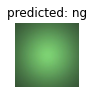

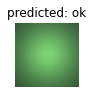

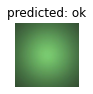

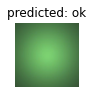

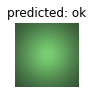

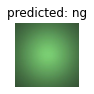

In [5]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

import matplotlib.pyplot as plt

plt.ion() # interactive mode

from google.colab import drive
drive.mount('/content/drive')

data_transforms = {
    'train': transforms.Compose([
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip( ),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/My Drive/camera_module_picture'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'test']}
dataset_size = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def imshow(inp, title=None):
  inp = inp.numpy().transpose((1,2,0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
    plt.title(title)
  plt.pause(0.001)

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

imshow(out, title = [class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
  since = time.time()
  best_model_wts = copy.deepcopy(model.state_dict( ))
  best_acc = 0.0

  loss_history = {'train': [], 'test': []}
  acc_history = {'train': [], 'test': []}

  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-'*10)
    for phase in ['train', 'test']:
      if phase == 'train':
        scheduler.step()
        model.train( )
      else:
        model.eval( )

      running_loss = 0.0
      running_correts = 0

      for inputs, labels in dataloaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad( )
        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)
          if phase == 'train':
            loss.backward()
            optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_correts += torch.sum(preds == labels.data)
      epoch_loss = running_loss / dataset_size[phase]
      epoch_acc = running_correts.double() / dataset_size[phase]

      loss_history[phase].append(epoch_loss)
      acc_history[phase].append(epoch_acc)

      print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
      if phase == 'test' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    print()
    
  time_elapsed = time.time() - since
  print('학습 완료 걸린시간: {:.0f}분 {:.0f}초'.format(time_elapsed // 60, time_elapsed % 60))
  print('Best test Acc: {:.4f}'.format(best_acc))
  model.load_state_dict(best_model_wts)

  return model, loss_history, acc_history

def visualize_model(model, num_images=6):
  was_training = model.training
  model.eval()
  images_so_far = 0
  fig = plt.figure()

  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      for j in range(inputs.size()[0]):
        images_so_far += 1
        ax = plt.subplot(num_images // 2, 2, images_so_far)
        ax.axis('off')
        ax.set_title('predicted: {}'.format(class_names[preds[j]]))
        imshow(inputs.cpu().data[j])

        if images_so_far ==num_images:
          model.train(mode = was_training)
          return
      model.train(mode=was_training)
#------------------------------------------------------------------------------------------------------------
model_ft = models.resnet18(pretrained=True) #사전 학습된 ResNet18 가져오기
num_ftrs = model_ft.fc.in_features #모델에서 feature extraction 후, FC층에 입력되는 특징 수
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device) #cpu나 GPU에 model_ft를 할당
criterion = nn.CrossEntropyLoss()

#모든 파라미터를 학습
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

#매 7 에포크 마다 학습률 0.1배 감소
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft, loss_ft, acc_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

visualize_model(model_ft)

#------------------------------------------------------------------------------------------------------------
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
  param.requires_grad = False #사전 학습된 모델의 가중치를 상수로  고정. 학습시키지 않음

#새로 생성된 모듈의 파라미터는 기본적으로 requires_grad = True
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)
criterion = nn.CrossEntropyLoss()

#마지막 층의 파라미터만 학습
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_conv, loss_conv, acc_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

visualize_model(model_conv)

plt.ioff()
plt.show()

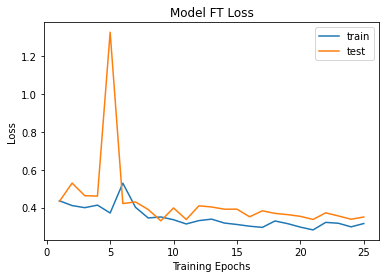

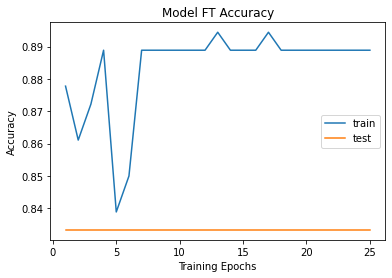

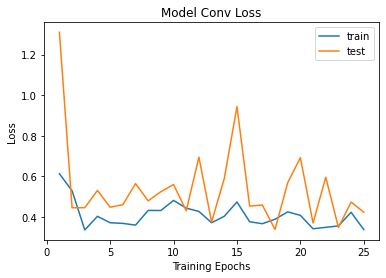

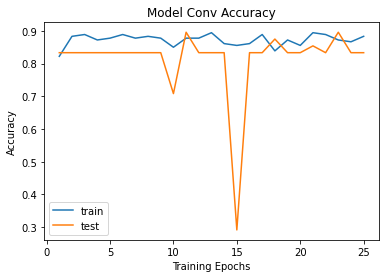

In [7]:
num_epochs = 25

# plot loss progress
plt.title("Model FT Loss")
plt.plot(range(1,num_epochs+1),loss_ft["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_ft["test"],label="test")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Model FT Accuracy")
plt.plot(range(1,num_epochs+1),acc_ft["train"],label="train")
plt.plot(range(1,num_epochs+1),acc_ft["test"],label="test")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot loss progress
plt.title("Model Conv Loss")
plt.plot(range(1,num_epochs+1),loss_conv["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_conv["test"],label="test")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Model Conv Accuracy")
plt.plot(range(1,num_epochs+1),acc_conv["train"],label="train")
plt.plot(range(1,num_epochs+1),acc_conv["test"],label="test")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()